In [ ]:
!pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [ ]:
patients_df = pd.read_csv('patients.csv')
patients_df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,...,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.00,42.15,-72.60,8446.49,1499.08
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,...,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.00,42.18,-71.28,89893.40,1845.72
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,999-27-3385,S99971451,X53218815X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.00,42.18,-72.61,577445.86,3528.84
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,999-73-2461,S99956432,NaN,NaN,Jimmie93,Harris789,NaN,...,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.08,-70.76,336701.72,2705.64
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,999-60-7372,S99917327,X58903159X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.00,42.35,-71.03,484076.34,3043.04


In [ ]:
patients_df.shape

(12352, 25)

In [ ]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12352 entries, 0 to 12351
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   12352 non-null  object 
 1   BIRTHDATE            12352 non-null  object 
 2   DEATHDATE            2352 non-null   object 
 3   SSN                  12352 non-null  object 
 4   DRIVERS              10399 non-null  object 
 5   PASSPORT             9845 non-null   object 
 6   PREFIX               10110 non-null  object 
 7   FIRST                12352 non-null  object 
 8   LAST                 12352 non-null  object 
 9   SUFFIX               124 non-null    object 
 10  MAIDEN               3540 non-null   object 
 11  MARITAL              8833 non-null   object 
 12  RACE                 12352 non-null  object 
 13  ETHNICITY            12352 non-null  object 
 14  GENDER               12352 non-null  object 
 15  BIRTHPLACE           12352 non-null 

In [ ]:
patients_df.describe()

,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,6700.00,12352.00,12352.00,12352.00,12352.00
mean,1991.14,42.27,-71.36,823340.16,13143.89
std,446.36,0.28,0.61,560901.64,43923.34
min,1001.00,41.24,-73.48,500.00,0.00
25%,1757.00,42.12,-71.56,271270.82,3228.08
50%,2116.00,42.31,-71.16,822483.43,6138.94
75%,2199.00,42.45,-71.03,1359019.21,11442.49
max,2861.00,42.90,-69.92,3178011.87,2199825.08


In [ ]:
patients_df.isnull().sum()

,0
Id,0
BIRTHDATE,0
DEATHDATE,10000
SSN,0
DRIVERS,1953
PASSPORT,2507
PREFIX,2242
FIRST,0
LAST,0
SUFFIX,12228


# Data Preprocessing

In [ ]:
# return columns with missing values
missing_columns = patients_df.columns[patients_df.isnull().any()].tolist()
print(missing_columns)

['DEATHDATE', 'DRIVERS', 'PASSPORT', 'PREFIX', 'SUFFIX', 'MAIDEN', 'MARITAL', 'ZIP']


In [ ]:
# Missing values - drop rows with >50% missing values.
patients_df= patients_df.dropna(axis=1, thresh=0.5*len(patients_df))

In [ ]:
missing_columns = patients_df.columns[patients_df.isnull().any()].tolist()
print(missing_columns)

['DRIVERS', 'PASSPORT', 'PREFIX', 'MARITAL', 'ZIP']


In [ ]:
#Fill the missing values in MARITAL with "others"
patients_df['MARITAL'].fillna('others', inplace=True)

In [ ]:
missing_columns = patients_df.columns[patients_df.isnull().any()].tolist()
print(missing_columns)

['DRIVERS', 'PASSPORT', 'PREFIX', 'ZIP']


In [ ]:
# let's drop the following columns: DRIVERS, PASSPORT, PREFIX, SUFFIX, ZIP.
patients_df.drop(['DRIVERS', 'PASSPORT', 'PREFIX', 'ZIP'], axis=1, inplace=True)

In [ ]:
patients_df.isnull().sum()

,0
Id,0
BIRTHDATE,0
SSN,0
FIRST,0
LAST,0
MARITAL,0
RACE,0
ETHNICITY,0
GENDER,0
BIRTHPLACE,0


In [ ]:
patients_df.head()

,Id,BIRTHDATE,SSN,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,999-68-6630,Jacinto644,Kris249,others,white,nonhispanic,M,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,42.15,-72.60,8446.49,1499.08
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,999-15-5895,Alva958,Krajcik437,others,white,nonhispanic,F,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,42.18,-71.28,89893.40,1845.72
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,999-27-3385,Jayson808,Fadel536,S,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,42.18,-72.61,577445.86,3528.84
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,999-73-2461,Jimmie93,Harris789,others,white,nonhispanic,F,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,42.08,-70.76,336701.72,2705.64
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,999-60-7372,Gregorio366,Auer97,others,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,42.35,-71.03,484076.34,3043.04


In [ ]:
# Derived Age
current_year = datetime.now().year
patients_df['AGE'] = patients_df['BIRTHDATE'].apply(
    lambda x: current_year - int(x.split('-')[0]) if pd.notna(x) else np.nan
)

In [ ]:
# Age group.
bins = [0, 18, 35, 50, 65, 120]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
patients_df['AGE_GROUP'] = pd.cut(patients_df['AGE'], bins=bins, labels=labels)

In [ ]:
# Derived Target
patients_df['COVERAGE_RATIO'] = patients_df['HEALTHCARE_COVERAGE'] / patients_df['HEALTHCARE_EXPENSES']
patients_df['COVERAGE_RATIO'] = patients_df['COVERAGE_RATIO'].fillna(0)

In [ ]:
patients_df.head()

,Id,BIRTHDATE,SSN,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,...,CITY,STATE,COUNTY,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE,AGE_GROUP,COVERAGE_RATIO
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,999-68-6630,Jacinto644,Kris249,others,white,nonhispanic,M,Beverly Massachusetts US,...,Springfield,Massachusetts,Hampden County,42.15,-72.60,8446.49,1499.08,8,0-18,0.18
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,999-15-5895,Alva958,Krajcik437,others,white,nonhispanic,F,Boston Massachusetts US,...,Walpole,Massachusetts,Norfolk County,42.18,-71.28,89893.40,1845.72,9,0-18,0.02
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,999-27-3385,Jayson808,Fadel536,S,white,nonhispanic,M,Springfield Massachusetts US,...,Chicopee,Massachusetts,Hampden County,42.18,-72.61,577445.86,3528.84,33,19-35,0.01
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,999-73-2461,Jimmie93,Harris789,others,white,nonhispanic,F,Worcester Massachusetts US,...,Pembroke,Massachusetts,Plymouth County,42.08,-70.76,336701.72,2705.64,21,19-35,0.01
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,999-60-7372,Gregorio366,Auer97,others,white,nonhispanic,M,Patras Achaea GR,...,Boston,Massachusetts,Suffolk County,42.35,-71.03,484076.34,3043.04,29,19-35,0.01


### Visualizations

In [ ]:
# identify protected attributes.
protected_attributes = ['RACE', 'ETHNICITY', 'GENDER', 'AGE_GROUP']

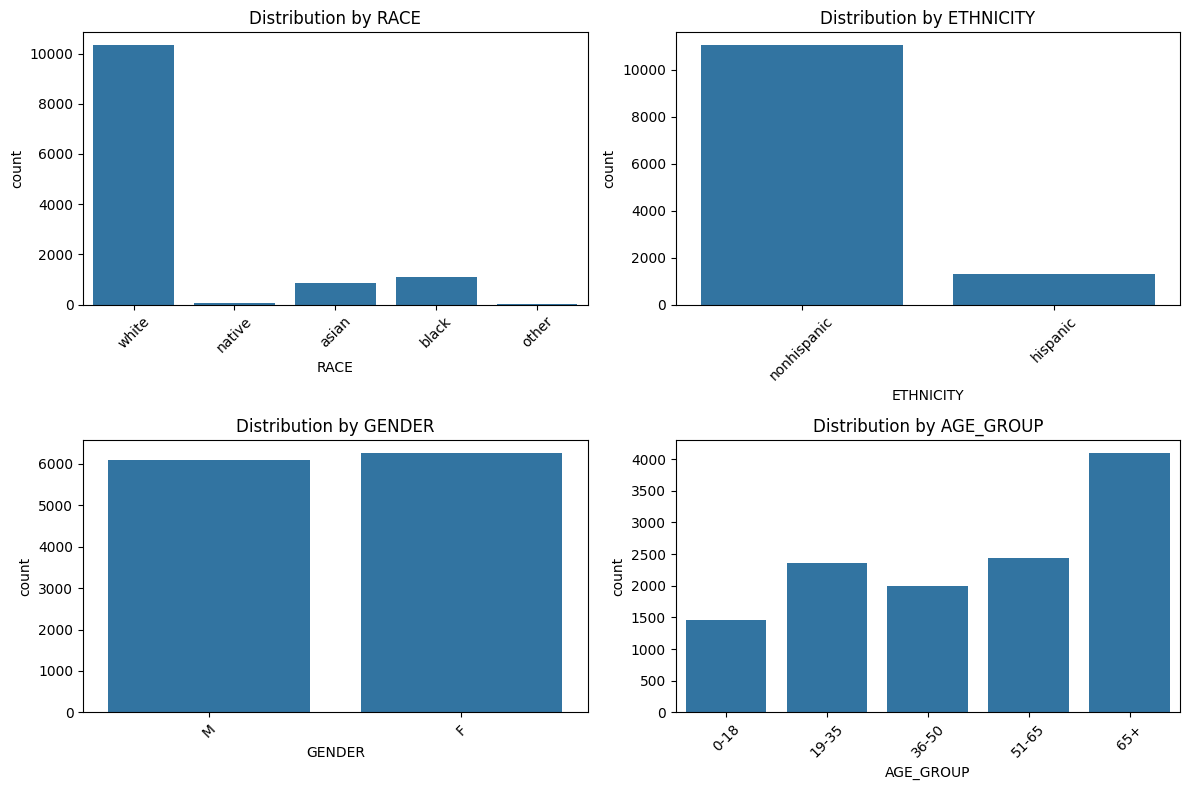

In [ ]:
#Demographic Distribution
plt.figure(figsize=(12, 8))
for i, attr in enumerate(protected_attributes):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=patients_df, x=attr)
    plt.title(f'Distribution by {attr}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('demographic_distribution.png')

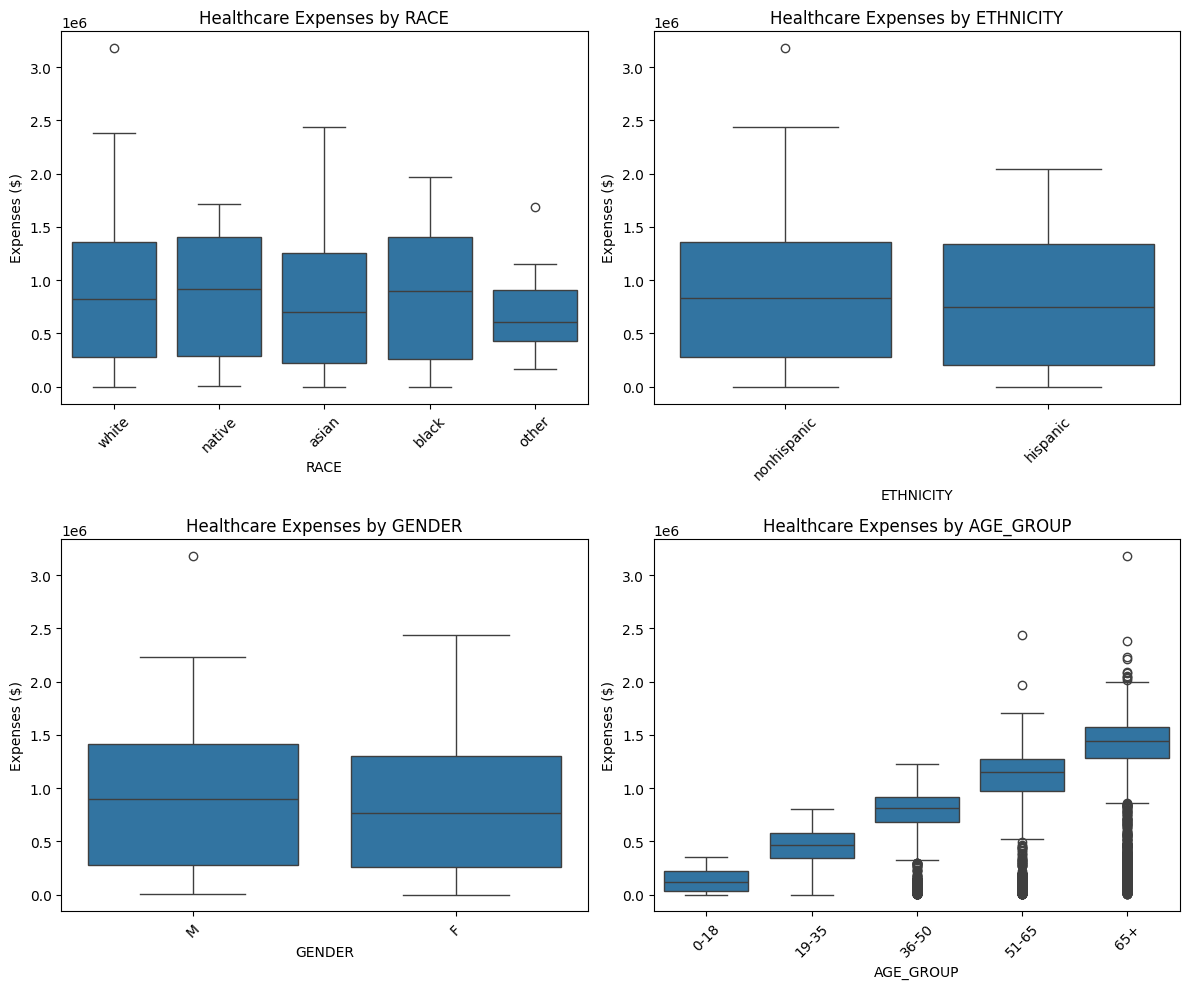

In [ ]:
# Healthcare expenses by demographic groups
plt.figure(figsize=(12, 10))
for i, attr in enumerate(protected_attributes):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=patients_df, x=attr, y='HEALTHCARE_EXPENSES')
    plt.title(f'Healthcare Expenses by {attr}')
    plt.xticks(rotation=45)
    plt.ylabel('Expenses ($)')
plt.tight_layout()
plt.savefig('expenses_by_demographics.png')

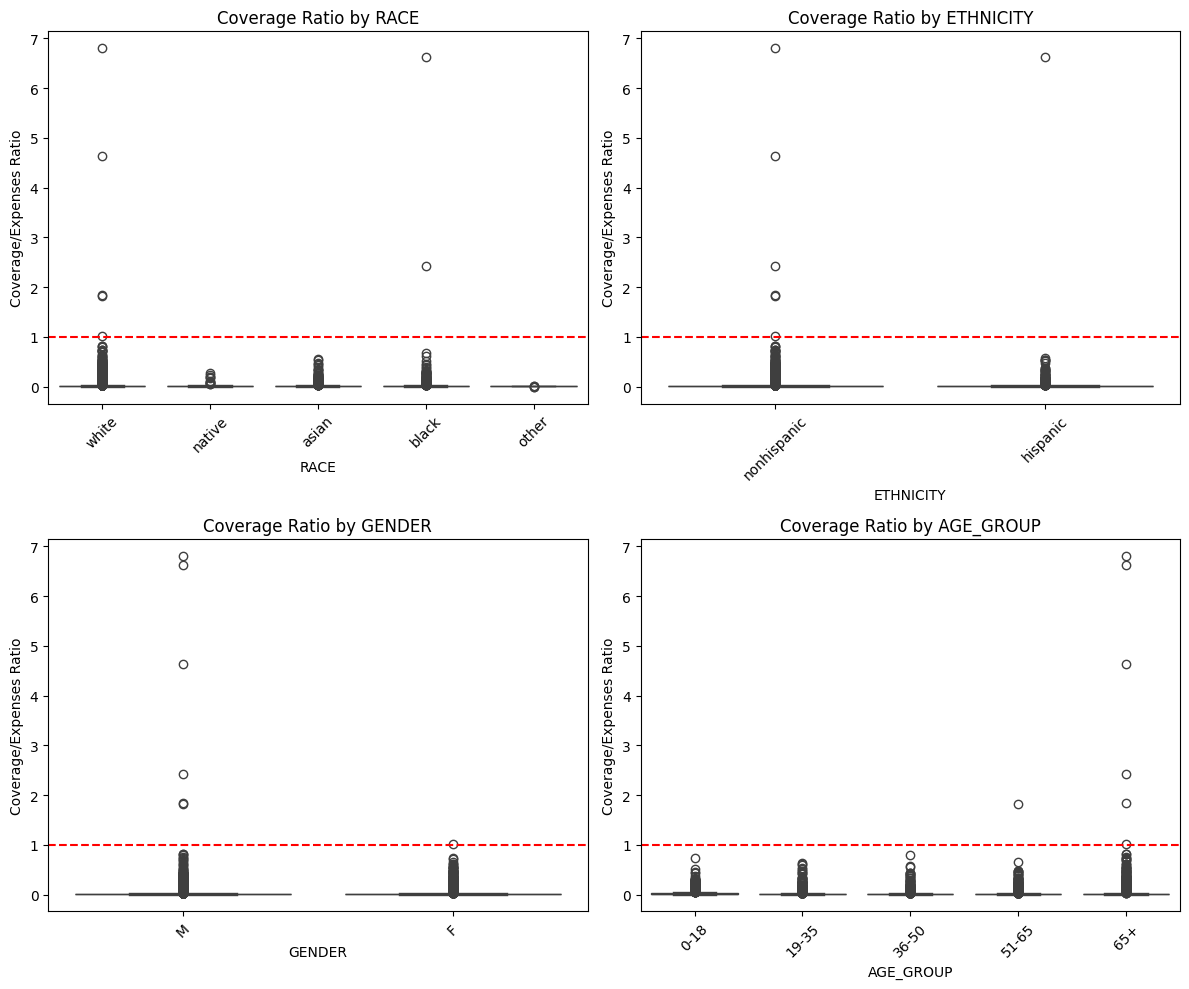

In [ ]:
# Coverage ratio by demographic groups
plt.figure(figsize=(12, 10))
for i, attr in enumerate(protected_attributes):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=patients_df, x=attr, y='COVERAGE_RATIO')
    plt.title(f'Coverage Ratio by {attr}')
    plt.xticks(rotation=45)
    plt.ylabel('Coverage/Expenses Ratio')
    plt.axhline(y=1.0, color='r', linestyle='--')  # Line where coverage equals expenses
plt.tight_layout()
plt.savefig('coverage_ratio_by_demographics.png')

# Data Level Fairness Analysis

## Class Imbalance & SPD Manual Calculations.

In [ ]:
patients_df['RACE'].value_counts(normalize=True) * 100

,proportion
RACE,
white,83.61
black,8.91
asian,6.82
native,0.59
other,0.07


### Class Imbalance Calculation

In [ ]:
# 3.1 Class Imbalance Check
for attr in protected_attributes:
    value_counts = patients_df[attr].value_counts(normalize=True) * 100
    print(f"\nDistribution of {attr}:")
    print(value_counts)

    # Flag underrepresented groups (less than 10%)
    underrepresented = value_counts[value_counts < 10].index.tolist()
    if underrepresented:
        print(f"Underrepresented {attr} groups (<10%): {underrepresented}")


Distribution of RACE:
RACE
white    83.61
black     8.91
asian     6.82
native    0.59
other     0.07
Name: proportion, dtype: float64
Underrepresented RACE groups (<10%): ['black', 'asian', 'native', 'other']

Distribution of ETHNICITY:
ETHNICITY
nonhispanic   89.35
hispanic      10.65
Name: proportion, dtype: float64

Distribution of GENDER:
GENDER
F   50.62
M   49.38
Name: proportion, dtype: float64

Distribution of AGE_GROUP:
AGE_GROUP
65+     33.14
51-65   19.71
19-35   19.15
36-50   16.17
0-18    11.84
Name: proportion, dtype: float64


### SPD Calculation for Healthcare Expenses.

Measures the difference in the rate of favorable outcomes between a protected group and a reference group (i.e white patient).

- SPD = 0 means perfect fairness (favorable outcomes at the same rate as the reference group).
- SPD > 0 means more favorable outcomes than the reference group.
- SPD < 0 means fewer favorable outcomes than the reference group.

In [ ]:
#1 - expenses above the mean. unfavourable.
#0 - expenses below the mean. favourable.
median_expense = patients_df['HEALTHCARE_EXPENSES'].median()
patients_df['HIGH_EXPENSES'] = (patients_df['HEALTHCARE_EXPENSES'] > median_expense).astype(int)

median_coverage = patients_df['HEALTHCARE_COVERAGE'].median()
patients_df['LOW_COVERAGE'] = (patients_df['HEALTHCARE_COVERAGE'] < median_coverage).astype(int) # 1 if coverage < median, 0 otherwise

In [ ]:
#HIGH EXPENSES as target
race_group = patients_df['RACE'].unique()
print(f"Race Groups: {race_group}")
ref_race_group = patients_df['RACE'].value_counts().idxmax()
print(f"Reference Race Group: {ref_race_group}")
ref_race_positive_rate = patients_df[patients_df['RACE'] == ref_race_group]['HIGH_EXPENSES'].mean()
print(f"Reference Race Group Positive Rate: {ref_race_positive_rate}")

for group in race_group:
  if group != ref_race_group:
    group_positive_rate = patients_df[patients_df['RACE'] == group]['HIGH_EXPENSES'].mean()
    spd = abs(group_positive_rate - ref_race_positive_rate)
    print(f"SPD for {group}: {spd}")

# spd closer to zero is better.

Race Groups: ['white' 'native' 'asian' 'black' 'other']
Reference Race Group: white
Reference Race Group Positive Rate: 0.501839659178931
SPD for native: 0.005009655889562148
SPD for asian: 0.05290854278938234
SPD for black: 0.020887613548341677
SPD for other: 0.16850632584559772


In [ ]:
# LOW Coverage as target
cov_ref_race_positive_rate = patients_df[patients_df['RACE'] == ref_race_group]['LOW_COVERAGE'].mean()
print(f"Reference Race Group Positive Rate for Coverage: {cov_ref_race_positive_rate}")

for group in race_group:
  if group != ref_race_group:
    cov_group_positive_rate = patients_df[patients_df['RACE'] == group]['LOW_COVERAGE'].mean()
    cov_spd = abs(cov_group_positive_rate - cov_ref_race_positive_rate)
    print(f"SPD for {group}: {cov_spd}")

Reference Race Group Positive Rate for Coverage: 0.49661115414407436
SPD for native: 0.04455635962352644
SPD for asian: 0.059208323290604936
SPD for black: 0.0066111541440743715
SPD for other: 0.2811666236337034


In [ ]:
def calculate_spd(df, protected_attr, target_col):
    # Calculate statistical parity difference (SPD) manually.

    groups = df[protected_attr].unique()
    reference_group = df[protected_attr].value_counts().idxmax()
    reference_group_positive_rate = df[df[protected_attr] == reference_group][target_col].mean()

    results = {}
    for group in groups:
        if group != reference_group:
            group_count = df[df[protected_attr] == group].shape[0]
            group_percent = (group_count / len(df)) * 100
            group_positive_rate = df[df[protected_attr] == group][target_col].mean()
            spd = abs(group_positive_rate - reference_group_positive_rate)
            results[group] = spd

            print(f"{group} (n={group_count}, {group_percent:.2f}%):")
            print(f"  Favorable outcome rate: {group_positive_rate:.4f}")
            print(f"  SPD: {spd:.4f}")

            if abs(spd) < 0.05:
                print("  ✓ Minimal difference from reference group")
            elif abs(spd) < 0.10:
                print("  ⚠️ Small difference from reference group")
            else:
                print("  ⚠️ Big difference from reference group")

    return results, reference_group, reference_group_positive_rate

In [ ]:
for attributes in protected_attributes:
  spd_results, ref_group, reference_group_positive_rate = calculate_spd(patients_df, attributes, 'HIGH_EXPENSES')
  print(f"SPD for {attributes} (reference: {ref_group}({reference_group_positive_rate:.4f}))\n\n")

native (n=73, 0.59%):
  Favorable outcome rate: 0.5068
  SPD: 0.0050
  ✓ Minimal difference from reference group
asian (n=842, 6.82%):
  Favorable outcome rate: 0.4489
  SPD: 0.0529
  ⚠️ Small difference from reference group
black (n=1100, 8.91%):
  Favorable outcome rate: 0.5227
  SPD: 0.0209
  ✓ Minimal difference from reference group
other (n=9, 0.07%):
  Favorable outcome rate: 0.3333
  SPD: 0.1685
  ⚠️ Big difference from reference group
SPD for RACE (reference: white(0.5018))


hispanic (n=1316, 10.65%):
  Favorable outcome rate: 0.4757
  SPD: 0.0272
  ✓ Minimal difference from reference group
SPD for ETHNICITY (reference: nonhispanic(0.5029))


M (n=6099, 49.38%):
  Favorable outcome rate: 0.5273
  SPD: 0.0539
  ⚠️ Small difference from reference group
SPD for GENDER (reference: F(0.4734))


0-18 (n=1462, 11.84%):
  Favorable outcome rate: 0.0000
  SPD: 0.8168
  ⚠️ Big difference from reference group
19-35 (n=2366, 19.15%):
  Favorable outcome rate: 0.0000
  SPD: 0.8168
  ⚠️ Big

In [ ]:
for attributes in protected_attributes:
  spd_results, ref_group, reference_group_positive_rate = calculate_spd(patients_df, attributes, 'LOW_COVERAGE')
  print(f"SPD for {attributes} (reference: {ref_group}({reference_group_positive_rate:.4f}))\n\n")

native (n=73, 0.59%):
  Favorable outcome rate: 0.4521
  SPD: 0.0446
  ✓ Minimal difference from reference group
asian (n=842, 6.82%):
  Favorable outcome rate: 0.5558
  SPD: 0.0592
  ⚠️ Small difference from reference group
black (n=1100, 8.91%):
  Favorable outcome rate: 0.4900
  SPD: 0.0066
  ✓ Minimal difference from reference group
other (n=9, 0.07%):
  Favorable outcome rate: 0.7778
  SPD: 0.2812
  ⚠️ Big difference from reference group
SPD for RACE (reference: white(0.4966))


hispanic (n=1316, 10.65%):
  Favorable outcome rate: 0.5129
  SPD: 0.0145
  ✓ Minimal difference from reference group
SPD for ETHNICITY (reference: nonhispanic(0.4985))


M (n=6099, 49.38%):
  Favorable outcome rate: 0.6183
  SPD: 0.2337
  ⚠️ Big difference from reference group
SPD for GENDER (reference: F(0.3846))


0-18 (n=1462, 11.84%):
  Favorable outcome rate: 0.9897
  SPD: 0.8173
  ⚠️ Big difference from reference group
19-35 (n=2366, 19.15%):
  Favorable outcome rate: 0.8263
  SPD: 0.6538
  ⚠️ Big d

### Convert cat columns to numeric.

In [ ]:
categorical_columns = patients_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['Id', 'BIRTHDATE', 'SSN', 'FIRST', 'LAST', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'AGE_GROUP']


In [ ]:
patients_df_encoded = patients_df.copy()
encoder = {}
for column in categorical_columns:
  le = LabelEncoder()
  patients_df_encoded[column] = le.fit_transform(patients_df_encoded[column])
  encoder[column] = le
  if column == 'RACE':
        race_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"Race encoding: {race_mapping}")

Race encoding: {'asian': np.int64(0), 'black': np.int64(1), 'native': np.int64(2), 'other': np.int64(3), 'white': np.int64(4)}


## AIF360 Calculations for Class Imbalance & SPD

In [ ]:
# AIF360
!pip install aif360
!pip install 'aif360[Reductions]'
!pip install 'aif360[inFairness]'

In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

### AIF360 SPD for HIGH EXPENSES

In [ ]:
white_encoded = encoder['RACE'].transform(['white'])[0]
privileged_groups = [{'RACE': white_encoded}]
unprivileged_groups = [{'RACE': val} for val in patients_df_encoded['RACE'].unique() if val != white_encoded]

In [ ]:
# Create a binary label dataset
exp_binary_label_dataset = BinaryLabelDataset(
    df=patients_df_encoded,
    label_names=['HIGH_EXPENSES'],
    protected_attribute_names=['RACE'],
    favorable_label=0,
    unfavorable_label=1
)

In [ ]:
exp_metrics = BinaryLabelDatasetMetric(
    exp_binary_label_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

In [ ]:
print("\nStatistical Parity Difference:", exp_metrics.statistical_parity_difference())
print("Disparate Impact:", exp_metrics.disparate_impact())

# spd should be close to zero. spd of 0.0112 means non-white patients are slightly more likely to have below-median healthcare expenses
# di should be close to 1 to indicate fairness. values between 0.8-1.25 are acceptable.
# 1.02 di score means non white have 102.3% probability of having lower expenses compared to white.


Statistical Parity Difference: 0.011227010957587213
Disparate Impact: 1.02253694250145


### AIF360 SPD for LOW COVERAGE

In [ ]:
# Create a binary label dataset
cov_binary_label_dataset = BinaryLabelDataset(
    df=patients_df_encoded,
    label_names=['LOW_COVERAGE'],
    protected_attribute_names=['RACE'],
    favorable_label=0,
    unfavorable_label=1
)

cov_metrics = BinaryLabelDatasetMetric(
    cov_binary_label_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

In [ ]:
print("\nStatistical Parity Difference:", cov_metrics.statistical_parity_difference())
print("Disparate Impact:", cov_metrics.disparate_impact())


Statistical Parity Difference: -0.02068133597450278
Disparate Impact: 0.9589157841999106


In [ ]:
race_categories = encoder['RACE'].classes_
print("Race Categories:", race_categories)

white_encoded = encoder['RACE'].transform(['white'])[0]
white_index = exp_binary_label_dataset.protected_attribute_names.index('RACE')

white_mask = exp_binary_label_dataset.protected_attributes[:, white_index] == white_encoded
white_favorable_rate = exp_binary_label_dataset.labels[white_mask].mean()

print(f"\nReference group (white) favorable outcome rate: {white_favorable_rate:.4f}")
print("\nStatistical Parity Difference by race:")

for race in race_categories:
    if race == 'white':
        continue

    race_encoded = encoder['RACE'].transform([race])[0]
    race_mask = exp_binary_label_dataset.protected_attributes[:, white_index] == race_encoded
    race_favorable_rate = exp_binary_label_dataset.labels[race_mask].mean()
    spd = abs(race_favorable_rate - white_favorable_rate)

    race_count = np.sum(race_mask)
    race_percent = (race_count / len(exp_binary_label_dataset.labels)) * 100

    print(f"{race} (n={race_count} ({race_percent:.2f}%): spd = {spd:.4f}")
    print(f"  Favorable outcome rate: {race_favorable_rate:.4f}")

    if abs(spd) < 0.05:
        print("  ✓ Minimal difference from reference group\n")
    elif abs(spd) < 0.10:
        print("  ⚠️ Small difference from reference group\n")
    else:
        print("  ⚠️   Big difference from reference group\n")

Race Categories: ['asian' 'black' 'native' 'other' 'white']

Reference group (white) favorable outcome rate: 0.5018

Statistical Parity Difference by race:
asian (n=842 (6.82%): spd = 0.0529
  Favorable outcome rate: 0.4489
  ⚠️ Small difference from reference group

black (n=1100 (8.91%): spd = 0.0209
  Favorable outcome rate: 0.5227
  ✓ Minimal difference from reference group

native (n=73 (0.59%): spd = 0.0050
  Favorable outcome rate: 0.5068
  ✓ Minimal difference from reference group

other (n=9 (0.07%): spd = 0.1685
  Favorable outcome rate: 0.3333
  ⚠️   Big difference from reference group



In [ ]:
race_categories = encoder['RACE'].classes_
print("Race Categories:", race_categories)

white_encoded = encoder['RACE'].transform(['white'])[0]
white_index = cov_binary_label_dataset.protected_attribute_names.index('RACE')

white_mask = cov_binary_label_dataset.protected_attributes[:, white_index] == white_encoded
white_favorable_rate = cov_binary_label_dataset.labels[white_mask].mean()

print(f"\nReference group (white) favorable outcome rate: {white_favorable_rate:.4f}")
print("\nStatistical Parity Difference by race:")

for race in race_categories:
    if race == 'white':
        continue

    race_encoded = encoder['RACE'].transform([race])[0]
    race_mask = cov_binary_label_dataset.protected_attributes[:, white_index] == race_encoded
    race_favorable_rate = cov_binary_label_dataset.labels[race_mask].mean()
    spd = abs(race_favorable_rate - white_favorable_rate)

    race_count = np.sum(race_mask)
    race_percent = (race_count / len(cov_binary_label_dataset.labels)) * 100

    print(f"{race} (n={race_count} ({race_percent:.2f}%): spd = {spd:.4f}")
    print(f"  Favorable outcome rate: {race_favorable_rate:.4f}")

    if abs(spd) < 0.05:
        print("  ✓ Minimal difference from reference group\n")
    elif abs(spd) < 0.10:
        print("  ⚠️ Small difference from reference group\n")
    else:
        print("  ⚠️   Big difference from reference group\n")

Race Categories: ['asian' 'black' 'native' 'other' 'white']

Reference group (white) favorable outcome rate: 0.4966

Statistical Parity Difference by race:
asian (n=842 (6.82%): spd = 0.0592
  Favorable outcome rate: 0.5558
  ⚠️ Small difference from reference group

black (n=1100 (8.91%): spd = 0.0066
  Favorable outcome rate: 0.4900
  ✓ Minimal difference from reference group

native (n=73 (0.59%): spd = 0.0446
  Favorable outcome rate: 0.4521
  ✓ Minimal difference from reference group

other (n=9 (0.07%): spd = 0.2812
  Favorable outcome rate: 0.7778
  ⚠️   Big difference from reference group



### Demographic Disparity Calculations - Manual & AIF360

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def calculate_demographic_disparity(df, protected_attr, outcome_col, unfavorable_outcome=1):
  # the difference between a group's representation in the overall population vs. their representation in the unfavorable outcome.

  total_count = len(patients_df)
  group_counts = df[protected_attr].value_counts()
  group_proportions = group_counts / total_count

  unfavorable_df = df[df[outcome_col] == unfavorable_outcome]
  unfavorable_count = len(unfavorable_df)
  unfavorable_group_counts = unfavorable_df[protected_attr].value_counts()
  unfavorable_group_proportions = unfavorable_group_counts / unfavorable_count

  print(f"DD for {outcome_col} (unfavorable outcome = {unfavorable_outcome}):")

  results = {}
  for group in group_proportions.index:
    overall_prop = group_proportions[group]
    unfavorable_prop = unfavorable_group_proportions.get(group, 0)
    disparity = unfavorable_prop - overall_prop
    disparity_ratio = unfavorable_prop / overall_prop if overall_prop > 0 else float('inf')

    results[group] = {
        'overall_proportion': overall_prop,
        'unfavorable_proportion': unfavorable_prop,
        'disparity': disparity,
        'disparity_ratio': disparity_ratio
    }

    print(f"\n{group}:")
    print(f"  Population representation: {overall_prop:.4f} ({group_counts[group]} individuals)")
    print(f"  Unfavorable outcome representation: {unfavorable_prop:.4f}")
    print(f"  Disparity: {disparity:.4f}")
    print(f"  Disparity ratio: {disparity_ratio:.4f}")

    if abs(disparity) < 0.05:
        print("  ✓ Minimal demographic disparity")
    elif abs(disparity) < 0.10:
        print("  ⚠️ Moderate demographic disparity")
    else:
        print("  ⚠️ Substantial demographic disparity")

  return results

In [ ]:
dd_expenses = calculate_demographic_disparity(patients_df, 'RACE', 'HIGH_EXPENSES', unfavorable_outcome=1)

# White patients make up about 83.6% of the dataset and 83.9% of high-expense cases - slight overrepresentation.
# Black patients are very slightly overrepresented in high-expense cases.
# Asian patients are slightly underrepresented in high-expense cases.
# Native patients have almost exactly proportional representation in high-expense cases.

DD for HIGH_EXPENSES (unfavorable outcome = 1):

white:
  Population representation: 0.8361 (10328 individuals)
  Unfavorable outcome representation: 0.8392
  Disparity: 0.0031
  Disparity ratio: 1.0037
  ✓ Minimal demographic disparity

black:
  Population representation: 0.0891 (1100 individuals)
  Unfavorable outcome representation: 0.0931
  Disparity: 0.0040
  Disparity ratio: 1.0455
  ✓ Minimal demographic disparity

asian:
  Population representation: 0.0682 (842 individuals)
  Unfavorable outcome representation: 0.0612
  Disparity: -0.0070
  Disparity ratio: 0.8979
  ✓ Minimal demographic disparity

native:
  Population representation: 0.0059 (73 individuals)
  Unfavorable outcome representation: 0.0060
  Disparity: 0.0001
  Disparity ratio: 1.0137
  ✓ Minimal demographic disparity

other:
  Population representation: 0.0007 (9 individuals)
  Unfavorable outcome representation: 0.0005
  Disparity: -0.0002
  Disparity ratio: 0.6667
  ✓ Minimal demographic disparity


In [ ]:
dd_coverage = calculate_demographic_disparity(patients_df, 'RACE', 'LOW_COVERAGE', unfavorable_outcome=1)

DD for LOW_COVERAGE (unfavorable outcome = 1):

white:
  Population representation: 0.8361 (10328 individuals)
  Unfavorable outcome representation: 0.8305
  Disparity: -0.0057
  Disparity ratio: 0.9932
  ✓ Minimal demographic disparity

black:
  Population representation: 0.0891 (1100 individuals)
  Unfavorable outcome representation: 0.0873
  Disparity: -0.0018
  Disparity ratio: 0.9800
  ✓ Minimal demographic disparity

asian:
  Population representation: 0.0682 (842 individuals)
  Unfavorable outcome representation: 0.0758
  Disparity: 0.0076
  Disparity ratio: 1.1116
  ✓ Minimal demographic disparity

native:
  Population representation: 0.0059 (73 individuals)
  Unfavorable outcome representation: 0.0053
  Disparity: -0.0006
  Disparity ratio: 0.9041
  ✓ Minimal demographic disparity

other:
  Population representation: 0.0007 (9 individuals)
  Unfavorable outcome representation: 0.0011
  Disparity: 0.0004
  Disparity ratio: 1.5556
  ✓ Minimal demographic disparity


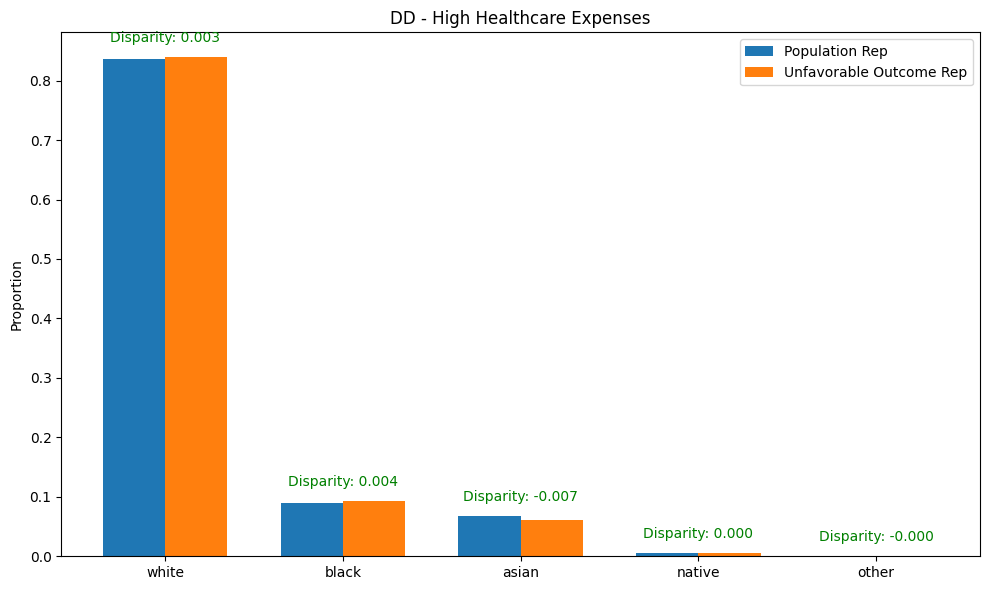

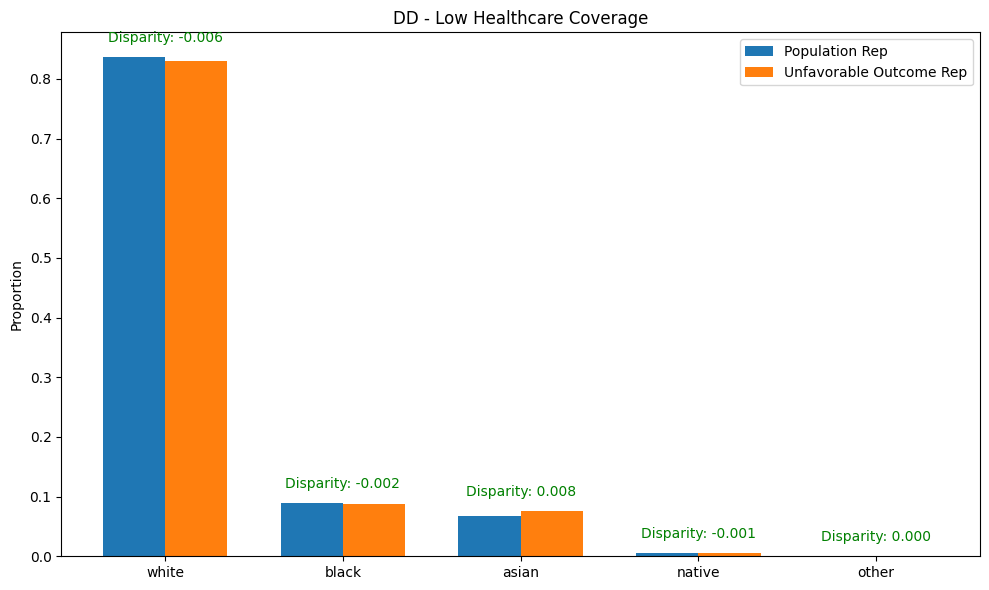

In [ ]:
def visualize_demographic_disparity(results, title):
    """visualization of demographic disparity."""

    groups = list(results.keys())
    overall_props = [results[g]['overall_proportion'] for g in groups]
    unfavorable_props = [results[g]['unfavorable_proportion'] for g in groups]

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.arange(len(groups))
    width = 0.35

    ax.bar(x - width/2, overall_props, width, label='Population Rep')
    ax.bar(x + width/2, unfavorable_props, width, label='Unfavorable Outcome Rep')

    ax.set_ylabel('Proportion')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(groups)
    ax.legend()

    for i, group in enumerate(groups):
        disparity = results[group]['disparity']
        color = 'green' if abs(disparity) < 0.05 else 'orange' if abs(disparity) < 0.10 else 'red'
        ax.annotate(f"Disparity: {disparity:.3f}",
                   xy=(i, max(overall_props[i], unfavorable_props[i]) + 0.02),
                   ha='center', va='bottom', color=color)

    plt.tight_layout()
    return fig

fig1 = visualize_demographic_disparity(dd_expenses, 'DD - High Healthcare Expenses')
fig2 = visualize_demographic_disparity(dd_coverage, 'DD - Low Healthcare Coverage')

# Algorithm Level Fairness Evaluation

In [ ]:
patients_df.head()

,Id,BIRTHDATE,SSN,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,...,COUNTY,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE,AGE_GROUP,COVERAGE_RATIO,HIGH_EXPENSES,LOW_COVERAGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,999-68-6630,Jacinto644,Kris249,others,white,nonhispanic,M,Beverly Massachusetts US,...,Hampden County,42.15,-72.60,8446.49,1499.08,8,0-18,0.18,0,1
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,999-15-5895,Alva958,Krajcik437,others,white,nonhispanic,F,Boston Massachusetts US,...,Norfolk County,42.18,-71.28,89893.40,1845.72,9,0-18,0.02,0,1
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,999-27-3385,Jayson808,Fadel536,S,white,nonhispanic,M,Springfield Massachusetts US,...,Hampden County,42.18,-72.61,577445.86,3528.84,33,19-35,0.01,0,1
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,999-73-2461,Jimmie93,Harris789,others,white,nonhispanic,F,Worcester Massachusetts US,...,Plymouth County,42.08,-70.76,336701.72,2705.64,21,19-35,0.01,0,1
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,999-60-7372,Gregorio366,Auer97,others,white,nonhispanic,M,Patras Achaea GR,...,Suffolk County,42.35,-71.03,484076.34,3043.04,29,19-35,0.01,0,1


In [ ]:
df = patients_df.copy()

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le
    print(f"Encoded {column}: {len(le.classes_)} unique values")

Encoded Id: 12352 unique values
Encoded BIRTHDATE: 8571 unique values
Encoded SSN: 12254 unique values
Encoded FIRST: 4220 unique values
Encoded LAST: 887 unique values
Encoded MARITAL: 3 unique values
Encoded RACE: 5 unique values
Encoded ETHNICITY: 2 unique values
Encoded GENDER: 2 unique values
Encoded BIRTHPLACE: 427 unique values
Encoded ADDRESS: 12352 unique values
Encoded CITY: 331 unique values
Encoded STATE: 1 unique values
Encoded COUNTY: 14 unique values
Encoded AGE_GROUP: 5 unique values


In [ ]:
race_mapping = dict(zip(encoders['RACE'].classes_, range(len(encoders['RACE'].classes_))))
print(f"Race encoding: {race_mapping}")

Race encoding: {'asian': 0, 'black': 1, 'native': 2, 'other': 3, 'white': 4}


In [ ]:
cols_to_drop = ['Id', 'HEALTHCARE_EXPENSES', 'LOW_COVERAGE']

X = df.drop(cols_to_drop + ['HIGH_EXPENSES'], axis=1)
y = df['HIGH_EXPENSES']

In [ ]:
# Scale numerical features
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f"Training data shape: {train_x.shape}")
print(f"Testing data shape: {test_x.shape}")

Training data shape: (8646, 19)
Testing data shape: (3706, 19)


In [ ]:
print("\nTrain multiple models with Lazy Predict...")
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(train_x, test_x, train_y, test_y)


Train multiple models with Lazy Predict...


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4285, number of negative: 4361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2927
[LightGBM] [Info] Number of data points in the train set: 8646, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495605 -> initscore=-0.017581
[LightGBM] [Info] Start training from score -0.017581


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
BaggingClassifier                  0.97               0.97     0.97      0.97   
RandomForestClassifier             0.97               0.97     0.97      0.97   
DecisionTreeClassifier             0.97               0.97     0.97      0.97   
AdaBoostClassifier                 0.96               0.96     0.96      0.96   
LinearSVC                          0.96               0.96     0.96      0.96   
CalibratedClassifierCV             0.96               0.96     0.96      0.96   
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
LogisticRegression                 0.94               0.94     0.94      0.94   
SVC                         

In [ ]:
top_performing_models = list(models.index[:5])
print(f"Best (Top) 5 models:{top_performing_models}")

num_top_models = min(5, len(models))
top_model_names = models.index[:num_top_models].tolist()
print(top_model_names)

Best (Top) 5 models:['LGBMClassifier', 'XGBClassifier', 'BaggingClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier']
['LGBMClassifier', 'XGBClassifier', 'BaggingClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier']


In [ ]:
top_models = {}
for model_name in top_model_names:
    if model_name in clf.models:
        pipeline = clf.models[model_name]
        classifier = pipeline.named_steps.get('classifier', None)

        if classifier:
            model_class = classifier.__class__
            top_models[model_name] = model_class()
            print(f"Successfully extracted {model_name}")
        else:
            print(f"Could not extract classifier from {model_name} pipeline")
    else:
        print(f"Model {model_name} not found in clf.models")

Successfully extracted LGBMClassifier
Successfully extracted XGBClassifier
Successfully extracted BaggingClassifier
Successfully extracted RandomForestClassifier
Successfully extracted DecisionTreeClassifier


In [ ]:
top_models

{'LGBMClassifier': LGBMClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'BaggingClassifier': BaggingClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier()}

## Fairness calculations for the top models

In [ ]:
white_encoded = race_mapping['white']
privileged_groups = [{'RACE': white_encoded}]
unprivileged_groups = [{'RACE': val} for key, val in race_mapping.items() if key != 'white']

In [ ]:
def evaluate_fairness_manually(y_true, y_pred, protected_attribute, privileged_value):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    protected_attribute = np.array(protected_attribute)

    privileged_mask = (protected_attribute == privileged_value)
    unprivileged_mask = ~privileged_mask

    # Calculate Statistical Parity Difference (difference in selection rate between unprivileged and privileged groups)
    priv_selection_rate = np.mean(y_pred[privileged_mask] == 0) if np.sum(privileged_mask) > 0 else 0
    unpriv_selection_rate = np.mean(y_pred[unprivileged_mask] == 0) if np.sum(unprivileged_mask) > 0 else 0
    spd = unpriv_selection_rate - priv_selection_rate

    # Calculate Disparate Impact (ratio of selection rate for unprivileged group to privileged group)
    if priv_selection_rate > 0:
        di = unpriv_selection_rate / priv_selection_rate
    else:
        di = float('inf') if unpriv_selection_rate > 0 else 1.0

    # Calculate Equal Opportunity Difference (difference in true positive rates between unprivileged and privileged groups)
    priv_positives = np.sum(y_true[privileged_mask] == 0)
    unpriv_positives = np.sum(y_true[unprivileged_mask] == 0)

    if priv_positives > 0:
        priv_tpr = np.sum((y_pred[privileged_mask] == 0) & (y_true[privileged_mask] == 0)) / priv_positives
    else:
        priv_tpr = 0

    if unpriv_positives > 0:
        unpriv_tpr = np.sum((y_pred[unprivileged_mask] == 0) & (y_true[unprivileged_mask] == 0)) / unpriv_positives
    else:
        unpriv_tpr = 0

    eod = unpriv_tpr - priv_tpr

    # Calculate Average Odds Difference (average of difference in TPR and difference in FPR)
    priv_negatives = np.sum(y_true[privileged_mask] == 1)
    unpriv_negatives = np.sum(y_true[unprivileged_mask] == 1)

    if priv_negatives > 0:
        priv_fpr = np.sum((y_pred[privileged_mask] == 0) & (y_true[privileged_mask] == 1)) / priv_negatives
    else:
        priv_fpr = 0

    if unpriv_negatives > 0:
        unpriv_fpr = np.sum((y_pred[unprivileged_mask] == 0) & (y_true[unprivileged_mask] == 1)) / unpriv_negatives
    else:
        unpriv_fpr = 0

    tpr_diff = unpriv_tpr - priv_tpr
    fpr_diff = unpriv_fpr - priv_fpr
    aod = (tpr_diff + fpr_diff) / 2

    return {
        'Statistical Parity Difference': spd,
        'Disparate Impact': di,
        'Equal Opportunity Difference': eod,
        'Average Odds Difference': aod
    }

In [ ]:
protected_attributes = test_x[['RACE']].values
protected_attribute_names = ['RACE']

In [ ]:
fairness_results = {}
model_predictions = {}
model_accuracies = {}

white_encoded = race_mapping['white']

for model_name, model in top_models.items():
  print(model_name, model)
  try:
    model.fit(train_x, train_y)

    y_pred = model.predict(test_x)
    model_predictions[model_name] = y_pred

    accuracy = (y_pred == test_y).mean()
    model_accuracies[model_name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")

    # Evaluate fairness metrics
    fairness_metrics = evaluate_fairness_manually(
        test_y,
        y_pred,
        test_x['RACE'],
        white_encoded
    )

    fairness_results[model_name] = fairness_metrics

    print(f"Fairness metrics for {model_name}:")
    for metric, value in fairness_metrics.items():
        print(f"  {metric}: {value:.4f}")

  except Exception as e:
    print(f"Error evaluating {model_name}: {str(e)}")
    continue

LGBMClassifier LGBMClassifier()
[LightGBM] [Info] Number of positive: 4285, number of negative: 4361
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2927
[LightGBM] [Info] Number of data points in the train set: 8646, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495605 -> initscore=-0.017581
[LightGBM] [Info] Start training from score -0.017581
Accuracy: 0.9914
Fairness metrics for LGBMClassifier:
  Statistical Parity Difference: 0.4860
  Disparate Impact: inf
  Equal Opportunity Difference: 0.9873
  Average Odds Difference: 0.4960
XGBClassifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=

In [ ]:
fairness_results

{'LGBMClassifier': {'Statistical Parity Difference': np.float64(0.48596869940636805),
  'Disparate Impact': inf,
  'Equal Opportunity Difference': np.float64(0.9873278236914601),
  'Average Odds Difference': np.float64(0.4960436051297068)},
 'XGBClassifier': {'Statistical Parity Difference': np.float64(0.4854290339989207),
  'Disparate Impact': inf,
  'Equal Opportunity Difference': np.float64(0.9851239669421488),
  'Average Odds Difference': np.float64(0.49547049748482375)},
 'BaggingClassifier': {'Statistical Parity Difference': np.float64(0.4878575283324339),
  'Disparate Impact': inf,
  'Equal Opportunity Difference': np.float64(0.9774104683195592),
  'Average Odds Difference': np.float64(0.49769518656591394)},
 'RandomForestClassifier': {'Statistical Parity Difference': np.float64(0.4819212088505127),
  'Disparate Impact': inf,
  'Equal Opportunity Difference': np.float64(0.9614325068870524),
  'Average Odds Difference': np.float64(0.49155707840386464)},
 'DecisionTreeClassifier':

### Accuracy vs fairness tradeoffs

In [ ]:
model_names = list(fairness_results.keys())
accuracies = [model_accuracies[model_name] for model_name in model_names]
spd_values = [abs(fairness_results[model_name]['Statistical Parity Difference']) for model_name in model_names]
eod_values = [abs(fairness_results[model_name]['Equal Opportunity Difference']) for model_name in model_names]

In [ ]:
max_accuracy = max(accuracies)
max_spd = max(spd_values) if max(spd_values) > 0 else 1
max_eod = max(eod_values) if max(eod_values) > 0 else 1

combined_scores = []
for i, model in enumerate(model_names):
    accuracy_score = accuracies[i] / max_accuracy
    fairness_score = 1 - ((spd_values[i] / max_spd + eod_values[i] / max_eod) / 2)
    combined_score = 0.5 * accuracy_score + 0.5 * fairness_score
    combined_scores.append(combined_score)

# Create ranking dataframe
ranking_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Statistical_Parity_Difference': [fairness_results[m]['Statistical Parity Difference'] for m in model_names],
    'Equal_Opportunity_Difference': [fairness_results[m]['Equal Opportunity Difference'] for m in model_names],
    'Combined_Score': combined_scores
})

ranking_df = ranking_df.sort_values('Combined_Score', ascending=False).reset_index(drop=True)

print("\nModel Ranking (balancing accuracy and fairness):")
print(ranking_df)


Model Ranking (balancing accuracy and fairness):
                    Model  Accuracy  Statistical_Parity_Difference  \
0           XGBClassifier      0.99                           0.49   
1          LGBMClassifier      0.99                           0.49   
2  RandomForestClassifier      0.97                           0.48   
3       BaggingClassifier      0.98                           0.49   
4  DecisionTreeClassifier      0.97                           0.49   

   Equal_Opportunity_Difference  Combined_Score  
0                          0.99            0.50  
1                          0.99            0.50  
2                          0.96            0.50  
3                          0.98            0.50  
4                          0.97            0.49  


## Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [ ]:
# Function to create and train neural network models
def create_neural_networks(train_x, test_x, train_y, test_y):
    """
    Create and train different neural network architectures.
    """
    input_dim = train_x.shape[1]
    nn_models = {}

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 1. Simple Single-Layer Network
    print("\nTraining Simple Single-Layer Network...")
    model1 = Sequential([
        Dense(16, activation='relu', input_dim=input_dim),
        Dense(1, activation='sigmoid')
    ])

    model1.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model1.fit(train_x, train_y,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              callbacks=[early_stopping],
              verbose=0)

    nn_models['SimpleNN'] = model1



    # 2. Deep Neural Network
    print("Training Deep Neural Network...")
    model2 = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model2.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model2.fit(train_x, train_y,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              callbacks=[early_stopping],
              verbose=0)

    nn_models['DeepNN'] = model2

    # # 3. Autoencoder-based Network
    # print("Training Autoencoder-based Network...")
    # # First, train an autoencoder
    # encoder = Sequential([
    #     Dense(32, activation='relu', input_dim=input_dim),
    #     Dense(16, activation='relu'),
    #     Dense(8, activation='relu')
    # ])

    # decoder = Sequential([
    #     Dense(16, activation='relu', input_dim=8),
    #     Dense(32, activation='relu'),
    #     Dense(input_dim, activation='linear')
    # ])

    # autoencoder = Sequential([encoder, decoder])
    # autoencoder.compile(optimizer='adam', loss='mse')

    # autoencoder.fit(train_x, train_y,
    #                epochs=30,
    #                batch_size=32,
    #                validation_split=0.2,
    #                verbose=0)

    # encoded_input = encoder(Input(shape=(input_dim,)))
    # classifier_layers = Dense(8, activation='relu')(encoded_input)
    # classifier_layers = Dense(1, activation='sigmoid')(classifier_layers)

    # autoencoder_classifier = Model(inputs=encoder.input, outputs=classifier_layers)
    # autoencoder_classifier.compile(optimizer=Adam(learning_rate=0.001),
    #                               loss='binary_crossentropy',
    #                               metrics=['accuracy'])

    # autoencoder_classifier.fit(train_x, train_y,
    #                           epochs=50,
    #                           batch_size=32,
    #                           validation_split=0.2,
    #                           callbacks=[early_stopping],
    #                           verbose=0)

    # nn_models['AutoencoderNN'] = autoencoder_classifier

    # 4. Residual-like Network (with skip connections)
    print("Training Residual-like Network...")
    inputs = Input(shape=(input_dim,))
    x = Dense(32, activation='relu')(inputs)

    # First residual block
    block1 = Dense(32, activation='relu')(x)
    block1 = Dropout(0.2)(block1)
    block1 = Dense(32, activation='relu')(block1)
    x = concatenate([x, block1])  # Skip connection

    # Second residual block
    block2 = Dense(32, activation='relu')(x)
    block2 = Dropout(0.2)(block2)
    block2 = Dense(32, activation='relu')(block2)
    x = concatenate([x, block2])  # Skip connection

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    residual_model = Model(inputs=inputs, outputs=outputs)
    residual_model.compile(optimizer=Adam(learning_rate=0.001),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

    residual_model.fit(train_x, train_y,
                      epochs=50,
                      batch_size=32,
                      validation_split=0.2,
                      callbacks=[early_stopping],
                      verbose=0)

    nn_models['ResidualNN'] = residual_model

    return nn_models

In [ ]:
def evaluate_nn_models(nn_models, X_test, y_test, X_test_race, white_encoded):
    """
    Evaluate neural network models for accuracy and fairness.
    """
    nn_results = {}

    for model_name, model in nn_models.items():
        print(f"\nEvaluating {model_name}...")


        y_pred_prob = model.predict(X_test, verbose=0)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()

        # Calculate accuracy
        accuracy = (y_pred == y_test).mean()
        print(f"Accuracy: {accuracy:.4f}")

        # Evaluate fairness metrics
        fairness_metrics = evaluate_fairness_manually(
            y_test,
            y_pred,
            X_test_race,
            white_encoded
        )

        nn_results[model_name] = {
            'accuracy': accuracy,
            'fairness_metrics': fairness_metrics
        }

        print(f"Fairness metrics for {model_name}:")
        for metric, value in fairness_metrics.items():
            print(f"  {metric}: {value:.4f}")

    return nn_results

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)


print("\n=== Training Neural Network Models ===")
nn_models = create_neural_networks(X_train_scaled, X_test_scaled, train_y, test_y)


print("\n=== Evaluating Neural Network Models ===")
nn_results = evaluate_nn_models(nn_models, X_test_scaled, test_y, test_x['RACE'], white_encoded)

for model_name, results in nn_results.items():
    model_accuracies[model_name] = results['accuracy']
    fairness_results[model_name] = results['fairness_metrics']
    model_names.append(model_name)
    accuracies.append(results['accuracy'])
    spd_values.append(abs(results['fairness_metrics']['Statistical Parity Difference']))
    eod_values.append(abs(results['fairness_metrics']['Equal Opportunity Difference']))


=== Training Neural Network Models ===

Training Simple Single-Layer Network...
Training Deep Neural Network...
Training Residual-like Network...

=== Evaluating Neural Network Models ===

Evaluating SimpleNN...
Accuracy: 0.9285
Fairness metrics for SimpleNN:
  Statistical Parity Difference: 0.4603
  Disparate Impact: inf
  Equal Opportunity Difference: 0.8970
  Average Odds Difference: 0.4691

Evaluating DeepNN...
Accuracy: 0.9466
Fairness metrics for DeepNN:
  Statistical Parity Difference: 0.4682
  Disparate Impact: inf
  Equal Opportunity Difference: 0.9234
  Average Odds Difference: 0.4773

Evaluating ResidualNN...
Accuracy: 0.9530
Fairness metrics for ResidualNN:
  Statistical Parity Difference: 0.4827
  Disparate Impact: inf
  Equal Opportunity Difference: 0.9449
  Average Odds Difference: 0.4920
